# Market Segment Analysis of Electric Vehicle

# EV Market

In [11]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [14]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [15]:
df.shape

(124716, 17)

In [16]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [18]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

In [19]:
# As small values are missing hence we can neglect missing values from the dataset
df.dropna(inplace=True)

In [20]:
df.shape

(124038, 17)

In [21]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

<AxesSubplot:>

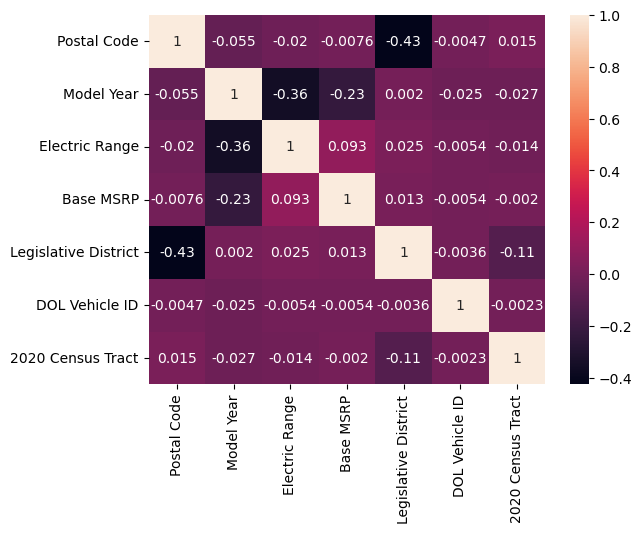

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
# No use of this columns

df_final = df.drop(columns = ['VIN (1-10)','State','Postal Code','DOL Vehicle ID','2020 Census Tract'],axis=1)

In [24]:
df_final.head()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility
0,Yakima,Yakima,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,POINT (-120.56916 46.58514),PACIFICORP
3,Yakima,Yakima,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,POINT (-120.56916 46.58514),PACIFICORP
4,Snohomish,Bothell,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC
5,Snohomish,Everett,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC
6,Kitsap,Poulsbo,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC


In [14]:
df_final['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            95753
Plug-in Hybrid Electric Vehicle (PHEV)    28285
Name: Electric Vehicle Type, dtype: int64

In [15]:
df_final['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         59092
Eligibility unknown as battery range has not been researched    49346
Not eligible due to low battery range                           15600
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

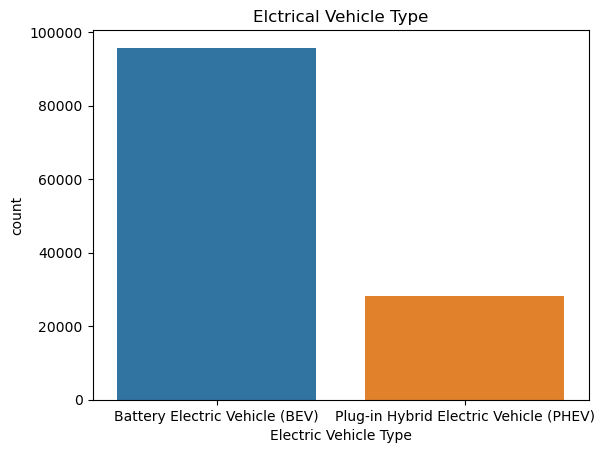

In [16]:
sns.countplot(x= 'Electric Vehicle Type', data=df_final)
plt.title('Elctrical Vehicle Type')
plt.show()

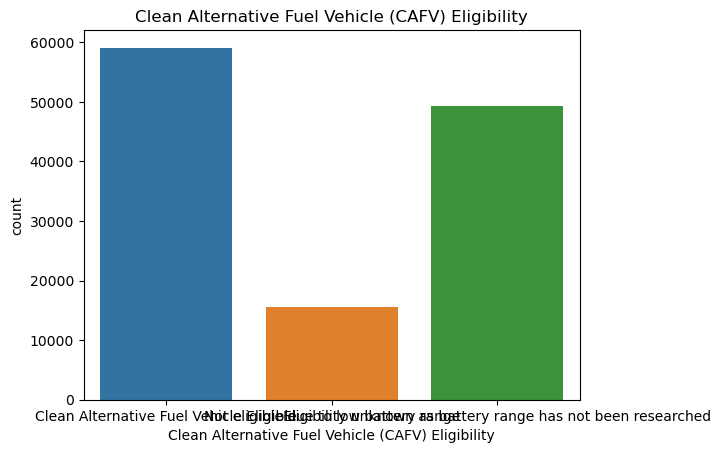

In [17]:
sns.countplot(x= "Clean Alternative Fuel Vehicle (CAFV) Eligibility", data=df_final)
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

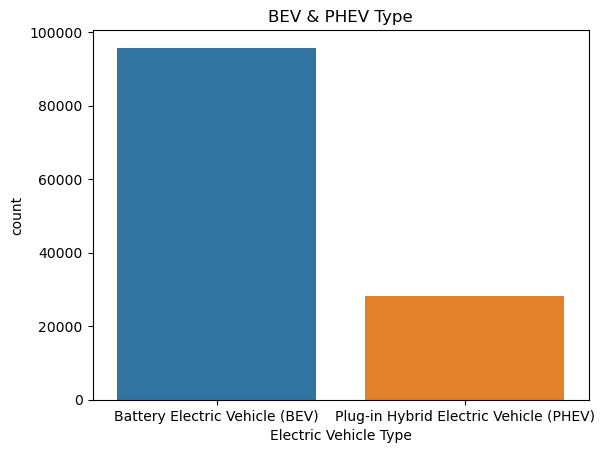

In [18]:
sns.countplot(x= 'Electric Vehicle Type', data=df_final)
plt.title('BEV & PHEV Type')
plt.show()

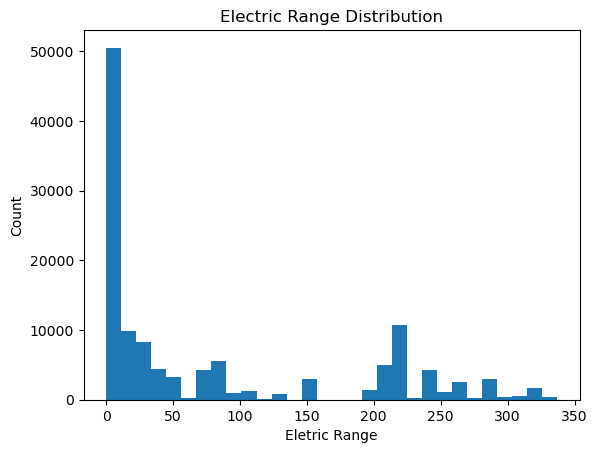

In [19]:
plt.hist(df_final['Electric Range'], bins = 30, align = 'mid')
plt.title("Electric Range Distribution")
plt.xlabel("Eletric Range")
plt.ylabel('Count')
plt.show()

# EDA and Visualization

In [25]:
ev_counts_by_make = df['Make'].value_counts().nlargest(10)

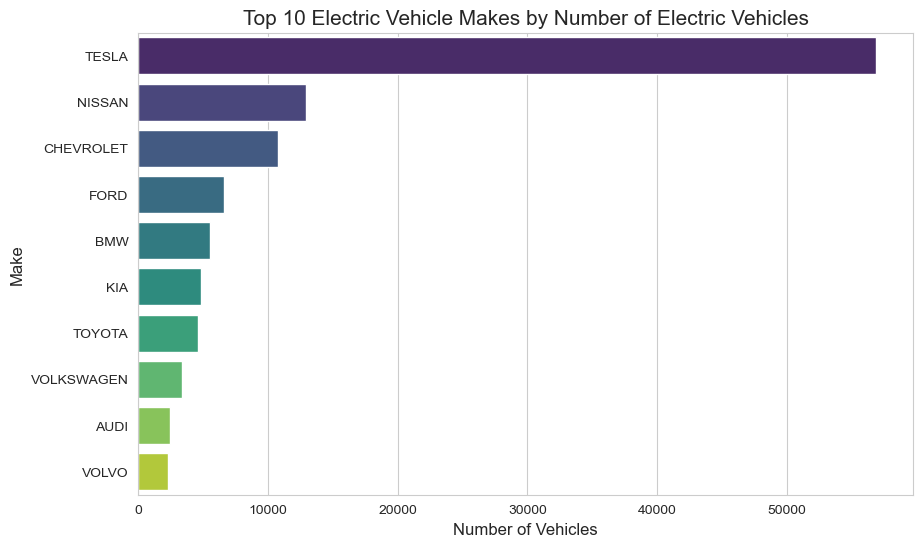

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

The visualization highlights Tesla as the top makes leading the electric vehicle market, We can say that Tesla is the most popular than any other brand.

# EV Adoption Over Time

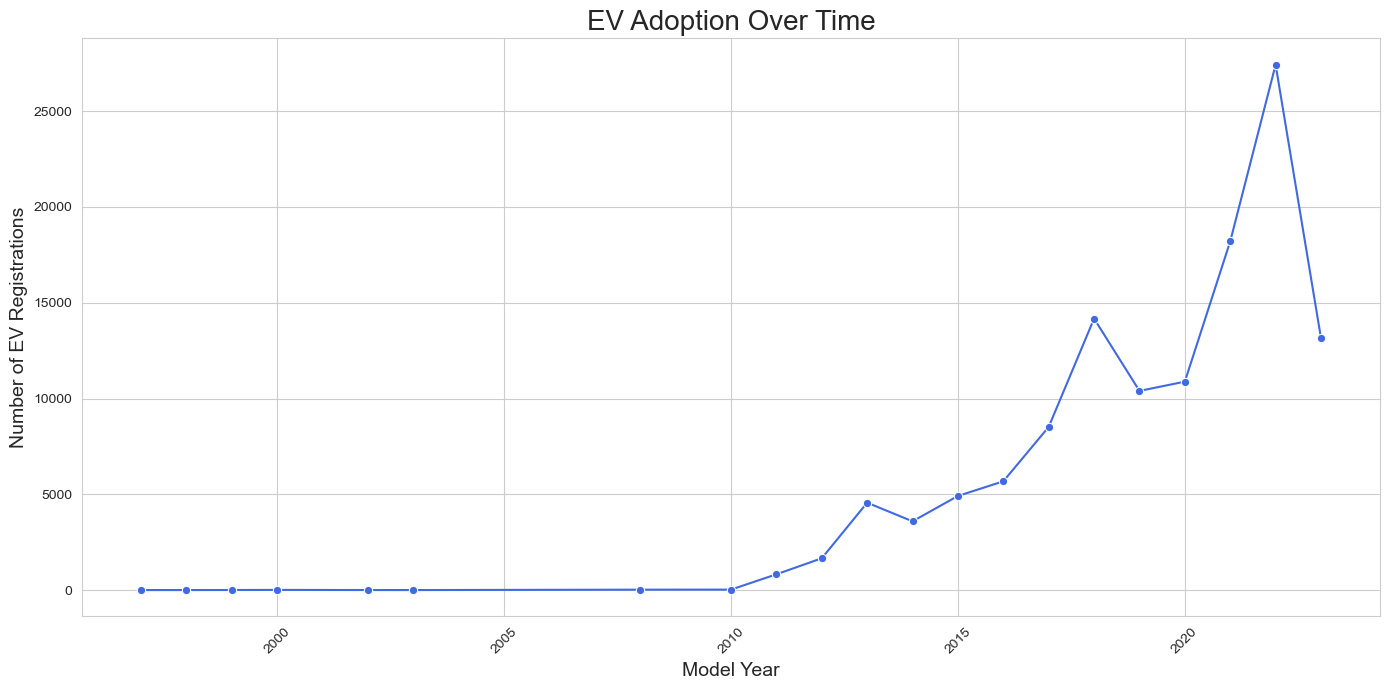

In [28]:
sns.set_style("whitegrid")
ev_adoption_over_time = df['Model Year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=ev_adoption_over_time.index, y=ev_adoption_over_time.values, marker='o', color='royalblue')
plt.title('EV Adoption Over Time', fontsize=20)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of EV Registrations', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 20 Counties by Electric Vehicle Counts

In [29]:
ev_count_distribution = df.groupby('County')['VIN (1-10)'].count().reset_index().sort_values(by='VIN (1-10)', ascending=False)
top_ev_counties = ev_count_distribution.head(20)



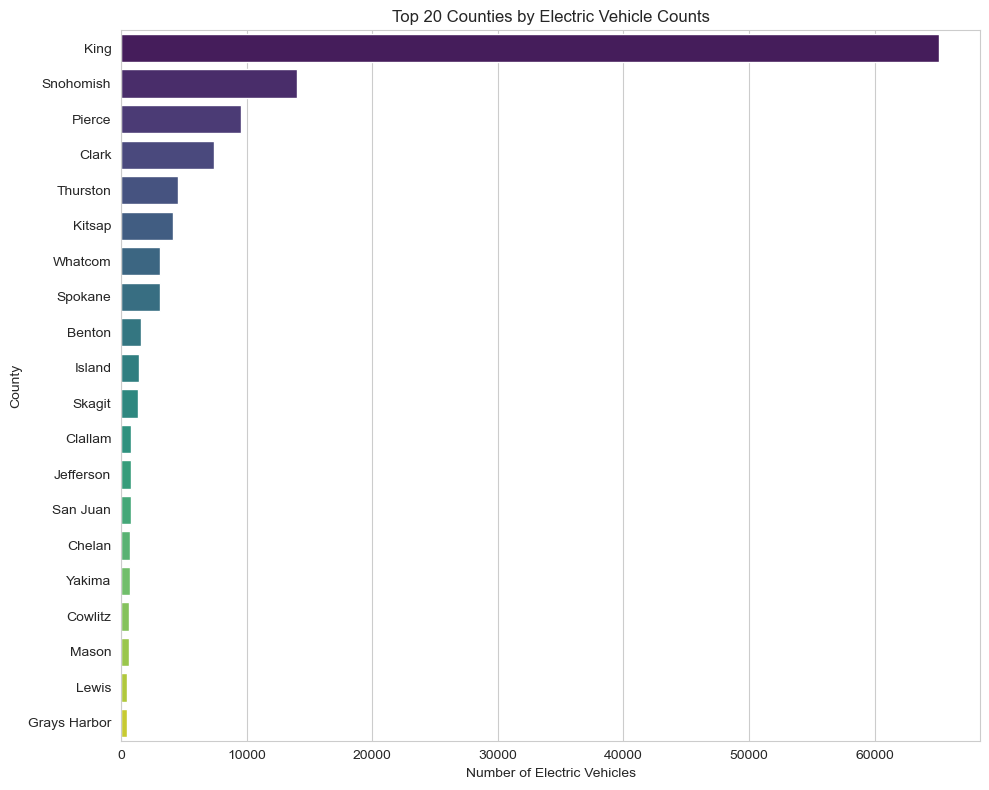

In [57]:
plt.figure(figsize=(10, 8))
sns.barplot(x='VIN (1-10)', y='County', data=top_ev_counties, palette='viridis')
plt.title('Top 20 Counties by Electric Vehicle Counts')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()

# Comparison of BEVs and PHEVs Popularity Over Years

In [32]:
# Filtering the dataset to include only BEVs and PHEV
ev_types_df = df[df['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Grouping the data by model year electric vehicle and counts
yearly_ev_counts = ev_types_df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0).reset_index()

<Figure size 1400x800 with 0 Axes>

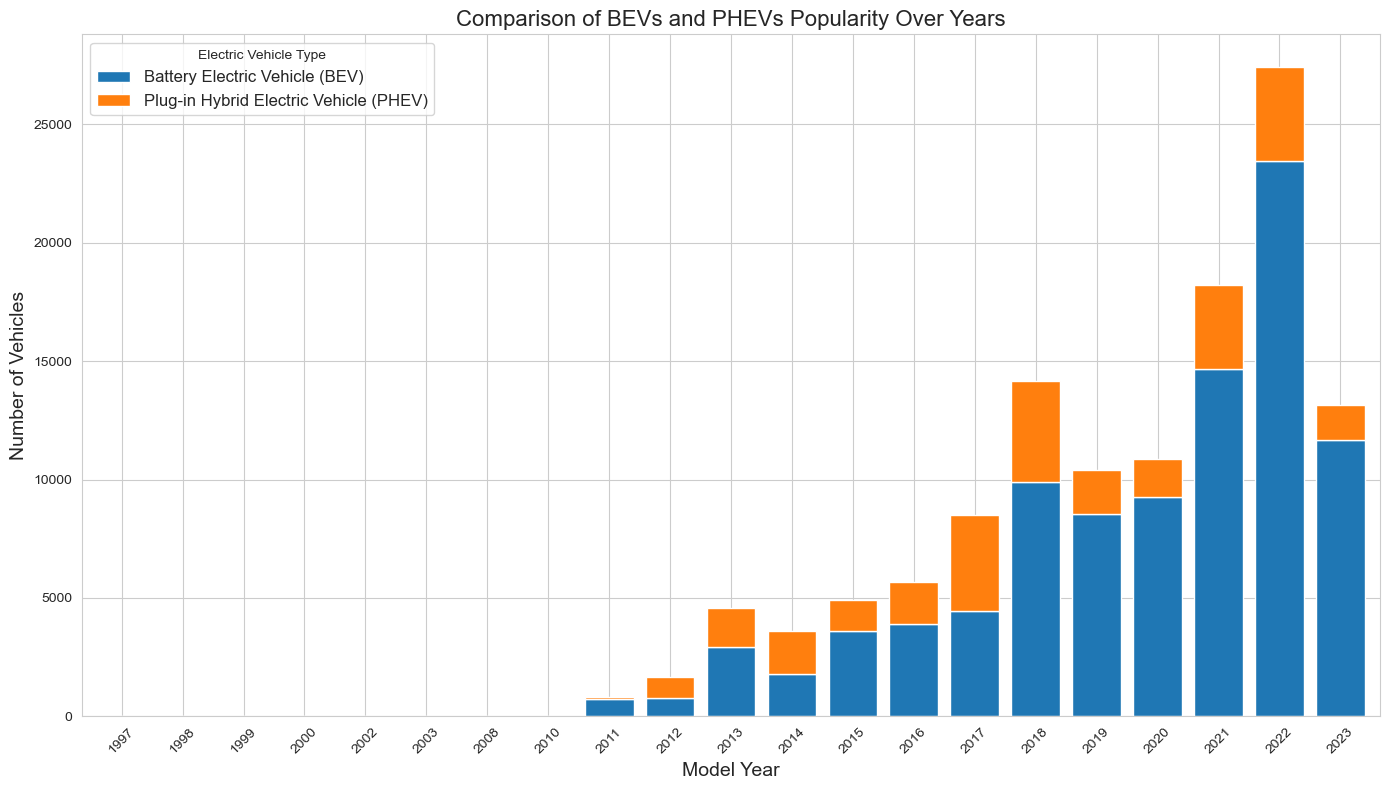

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
yearly_ev_counts.plot(kind='bar', stacked=True, x='Model Year', figsize=(14, 8), width=0.8)
plt.title('Comparison of BEVs and PHEVs Popularity Over Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type', fontsize=12)
plt.tight_layout()
plt.show()

# Improvement in Electric Range of Vehicles Over the Years

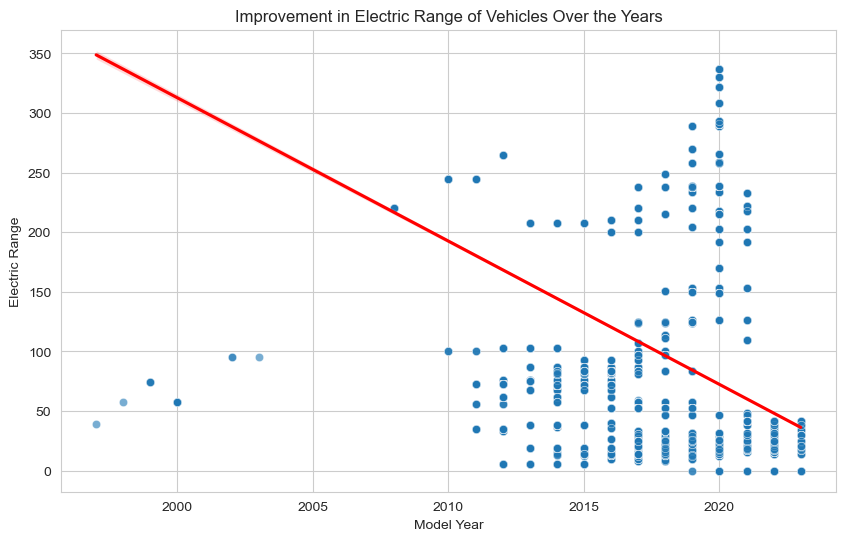

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', alpha=0.6)

plt.title('Improvement in Electric Range of Vehicles Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')

sns.regplot(data=df, x='Model Year', y='Electric Range', scatter=False, color='red')

plt.show()

# Distribution of Electric Vehicle Prices Over the Years

In [35]:
# Filtering out rows where Base MSRP is zero or high
filtered_df = df[(df['Base MSRP'] > 0) & (df['Base MSRP'] < 200000)]

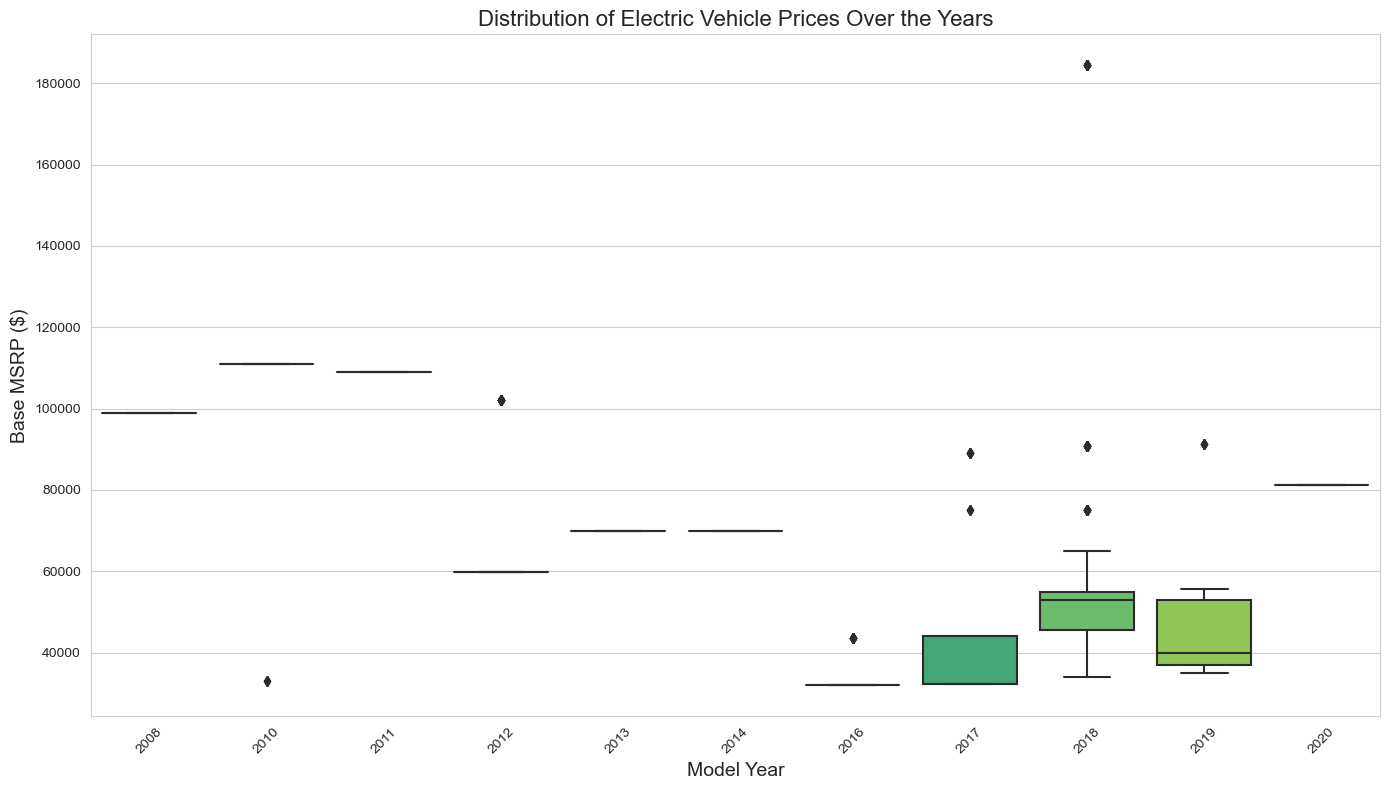

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Model Year', y='Base MSRP', palette="viridis")
plt.title('Distribution of Electric Vehicle Prices Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Electric Vehicle Prices by Top10 Make

In [37]:
top_makes = filtered_df['Make'].value_counts().nlargest(10).index
filtered_top_makes_df = filtered_df[filtered_df['Make'].isin(top_makes)]

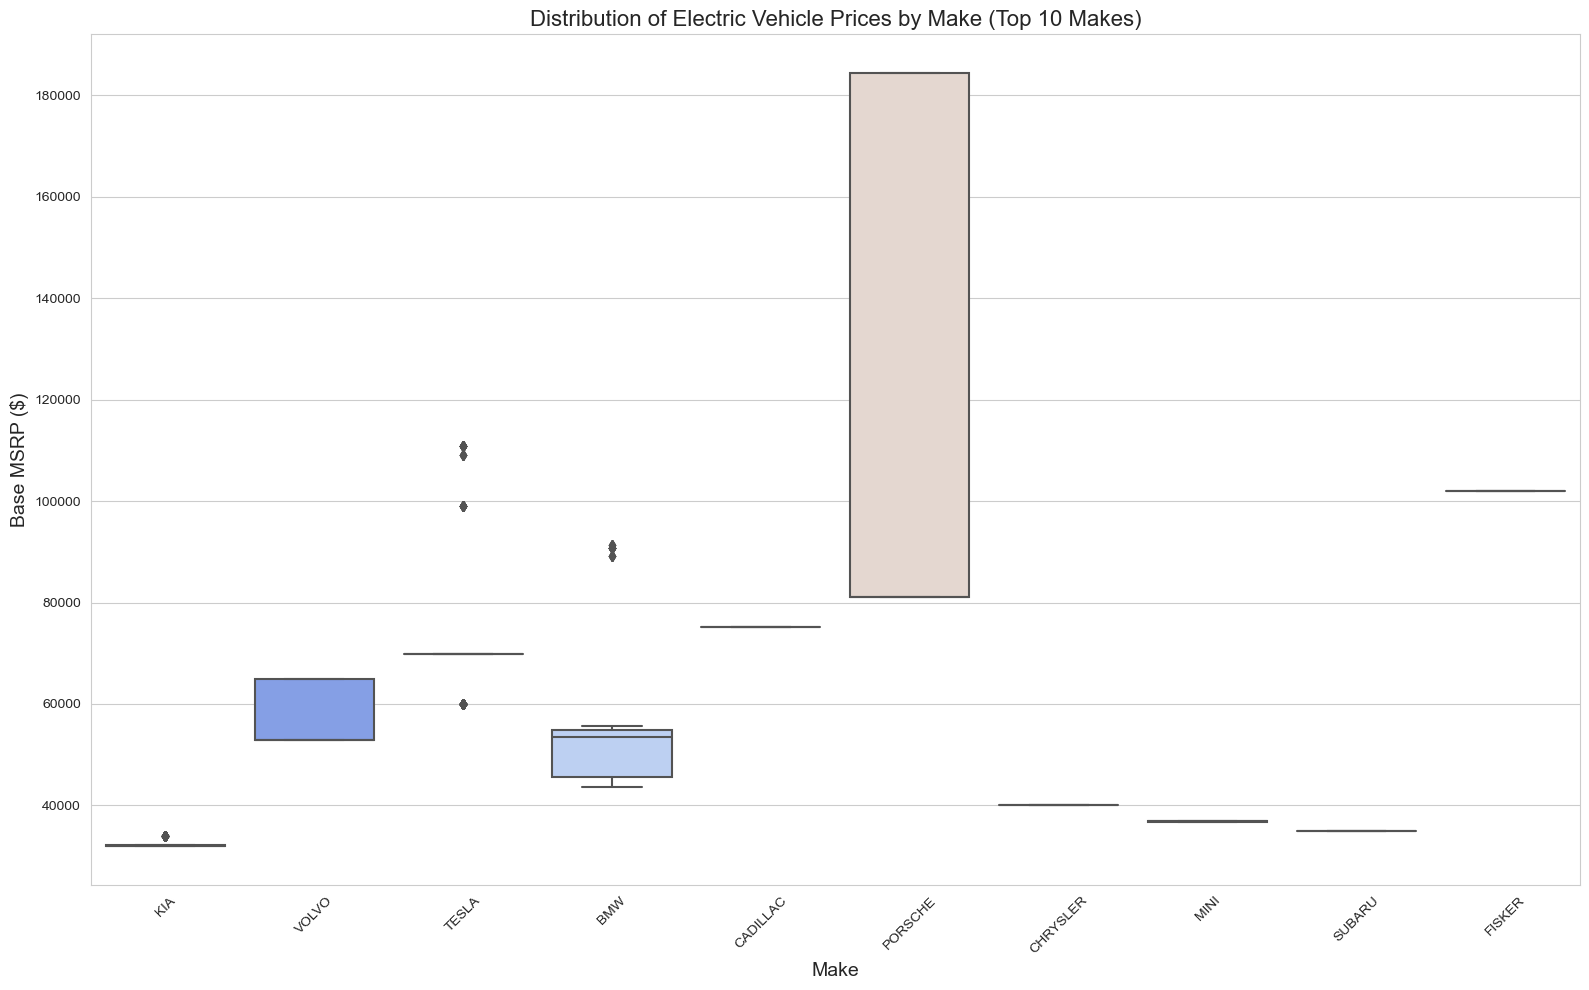

In [38]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=filtered_top_makes_df, x='Make', y='Base MSRP', palette="coolwarm")
plt.title('Distribution of Electric Vehicle Prices by Make (Top 10 Makes)', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Electric Utilities by Number of Electric Vehicles

In [39]:
utility_counts = df.groupby('Electric Utility')['DOL Vehicle ID'].count().reset_index()

utility_counts_sorted = utility_counts.sort_values(by='DOL Vehicle ID', ascending=False).head(10)

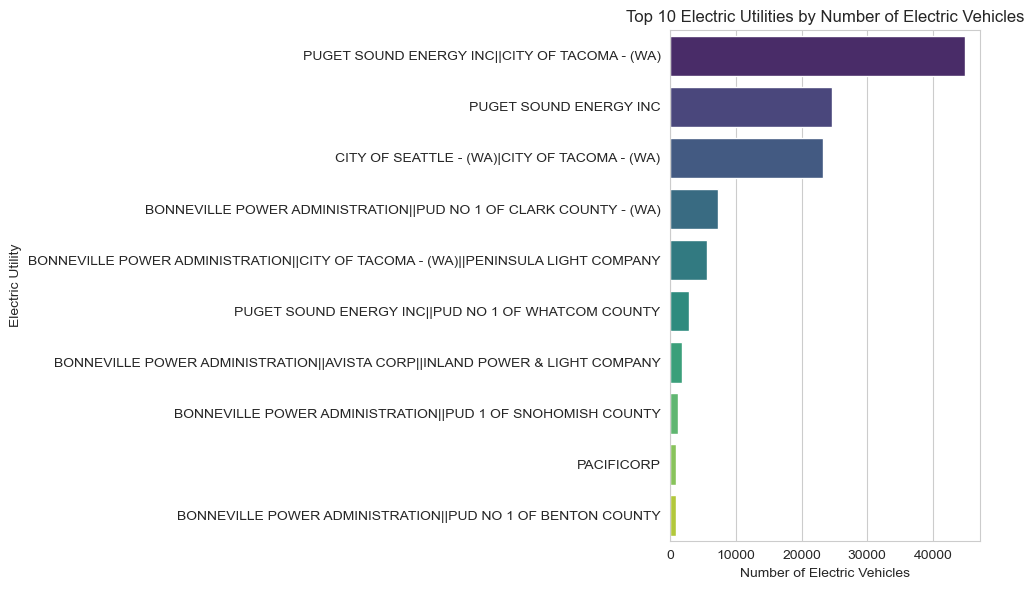

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=utility_counts_sorted, x='DOL Vehicle ID', y='Electric Utility', palette='viridis', order=utility_counts_sorted['Electric Utility'])

plt.title('Top 10 Electric Utilities by Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.tight_layout()
plt.show()

# Electric Vehicles by Legislative District

In [41]:
# Grouping by District and counting it by vehicle id
district_counts = df.groupby('Legislative District')['DOL Vehicle ID'].count().reset_index()

district_counts_sorted = district_counts.sort_values(by='DOL Vehicle ID', ascending=False)

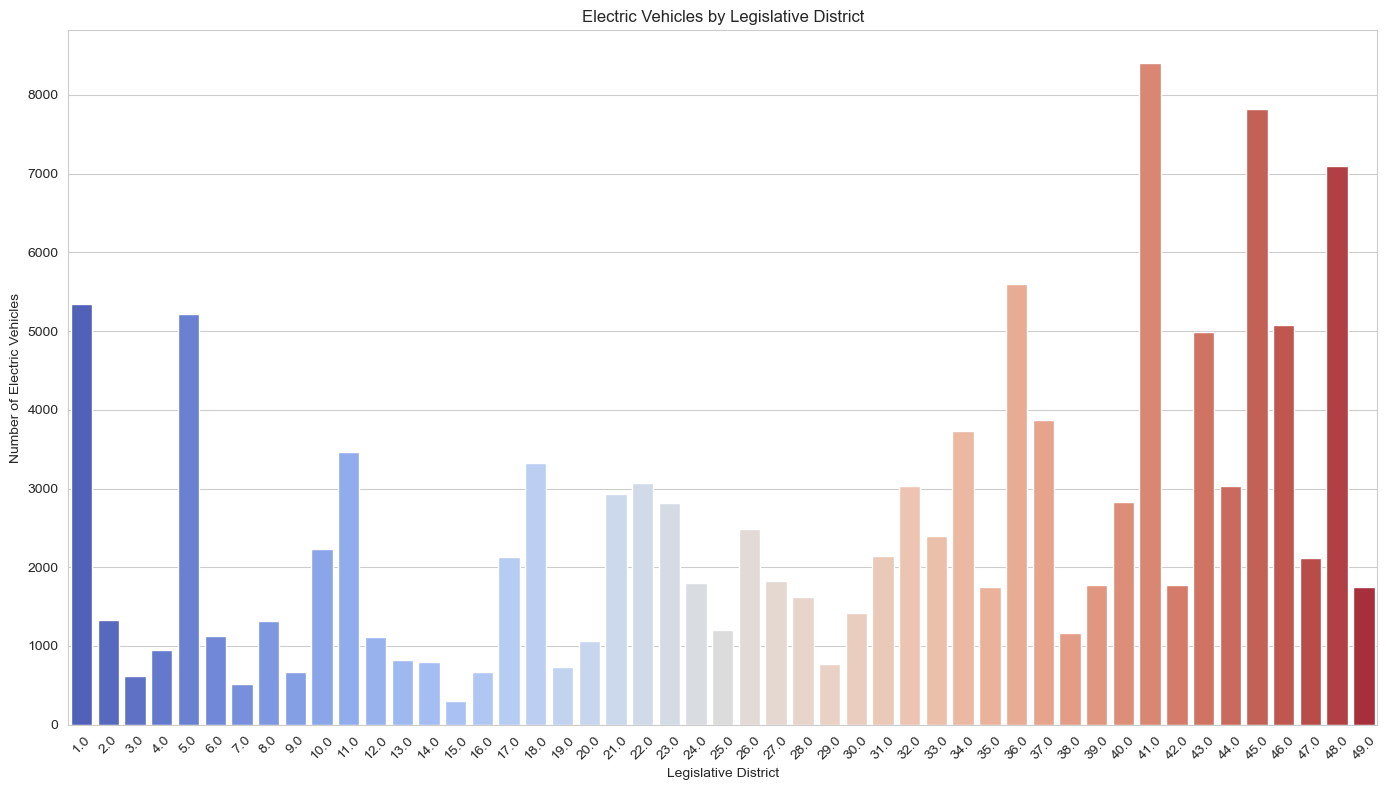

In [42]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Legislative District', y='DOL Vehicle ID', data=district_counts_sorted,
            palette='coolwarm')
plt.title('Electric Vehicles by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()